# Important Questions
1. What are the most engaging types of posts?
2. Which platform yields the highest engagement for the client?
3. What are the peak times for user engagement?
4. Are there any noticeable trends over time (e.g., increasing likes, decreasing shares)?
5. What is the average engagement rate per impression for each platform?
6. Understanding the preferred content types can inform content strategy.

### IMPORT NECCESSARY LIBRARIES

In [1]:
# Import libraries for data analysis and visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


## QUESTIONS AND ANSWERS
### 1. What are the most engaging types of posts?

In [2]:
# Define a dictionary of file paths for cleaned datasets
file_paths  = {
    "Facebook": "../data/interim/Facebook_cleaned.csv",
    "Instagram": "../data/interim/Instagram_cleaned.csv",
    "LinkedIn": "../data/interim/LinkedIn_cleaned.csv",
    "Twitter": "../data/interim/Twitter_cleaned.csv"
}

# Create an empty dictionary to store the datasets
data = {}

# Load the datasets into the dictionary
for platform, file_path in file_paths.items():
    data[platform] = pd.read_csv(file_path)


## 1. What are the most engaging types of posts?

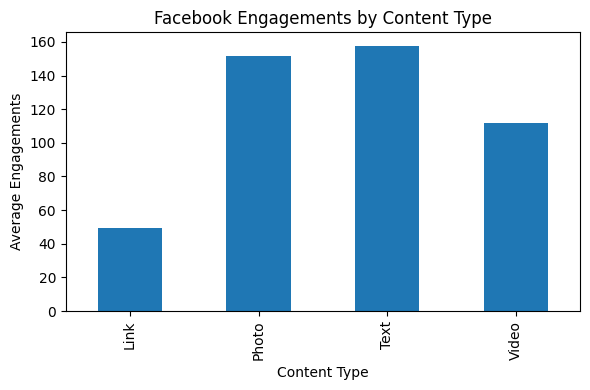

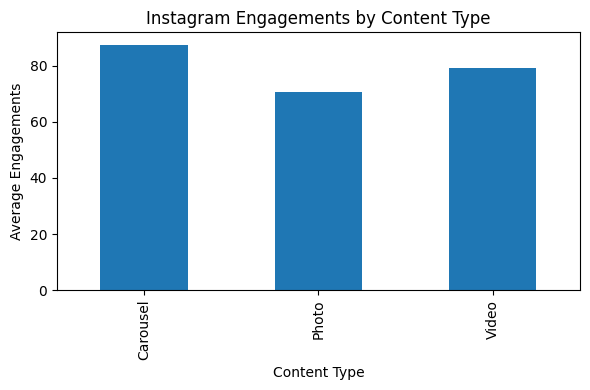

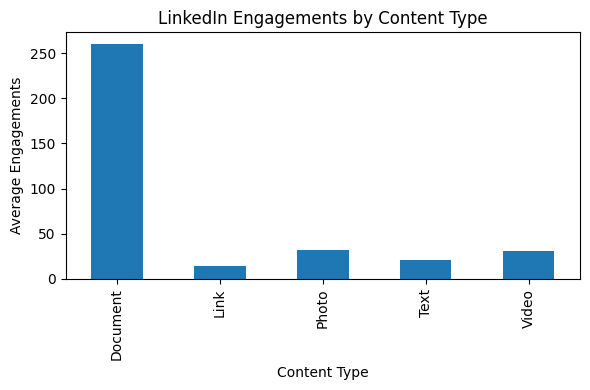

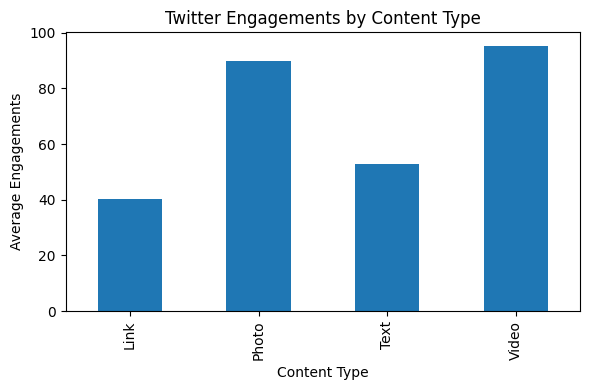

In [3]:

for platform, platform_data in data.items():
    engagements_by_type = platform_data.groupby('content_type')['engagements'].mean()

    plt.figure(figsize=(6, 4))
    engagements_by_type.plot(kind='bar', title=f'{platform} Engagements by Content Type')
    plt.xlabel('Content Type')
    plt.ylabel('Average Engagements')
    plt.tight_layout()
    plt.savefig(f'{platform}_engagements_by_type.png')
    plt.show()


## 2. Which platform yields the highest engagement for the client?

In [5]:


total_engagements = {platform: platform_data['engagements'].sum() for platform, platform_data in data.items()}
platform_with_highest_engagement = max(total_engagements, key=total_engagements.get)
print(platform_with_highest_engagement)

Facebook


## 3. What are the peak times for user engagement?

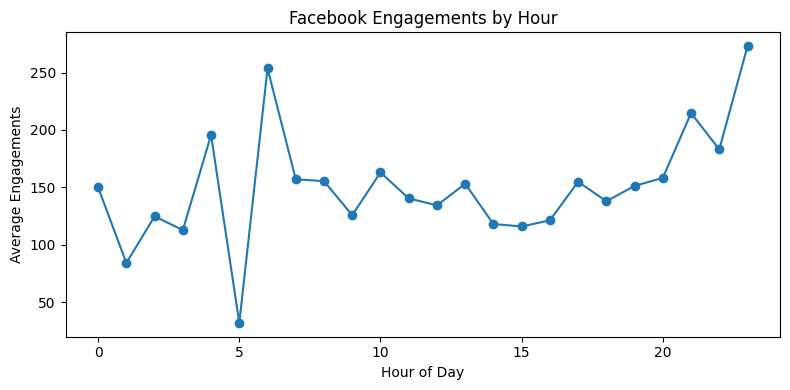

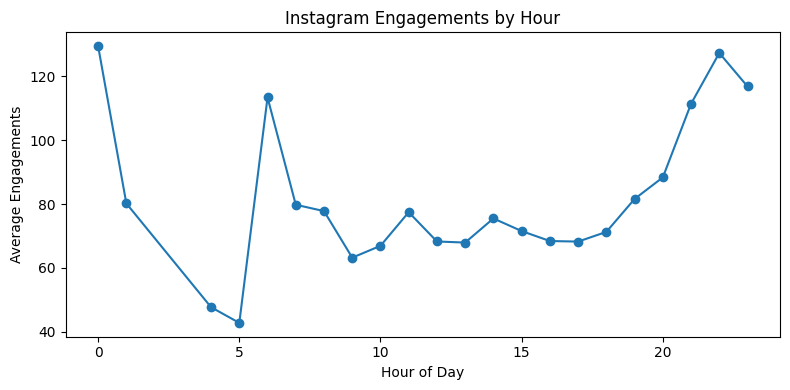

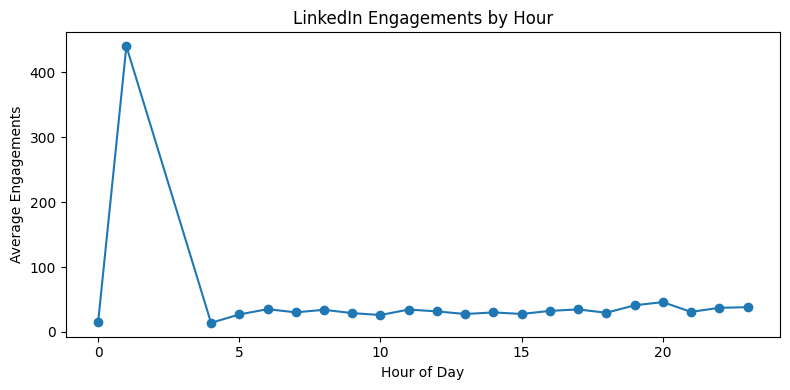

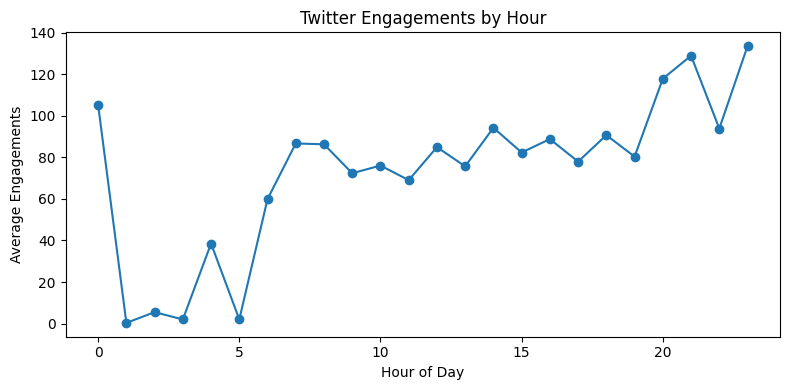

In [6]:
for platform, platform_data in data.items():
    platform_data['date'] = pd.to_datetime(platform_data['date'])
    platform_data['hour'] = platform_data['date'].dt.hour
    engagements_by_hour = platform_data.groupby('hour')['engagements'].mean()

    plt.figure(figsize=(8, 4))
    engagements_by_hour.plot(kind='line', marker='o', title=f'{platform} Engagements by Hour')
    plt.xlabel('Hour of Day')
    plt.ylabel('Average Engagements')
    plt.tight_layout()
    plt.savefig(f'{platform}_engagements_by_hour.png')
    plt.show()

## 4. Are there any noticeable trends over time?

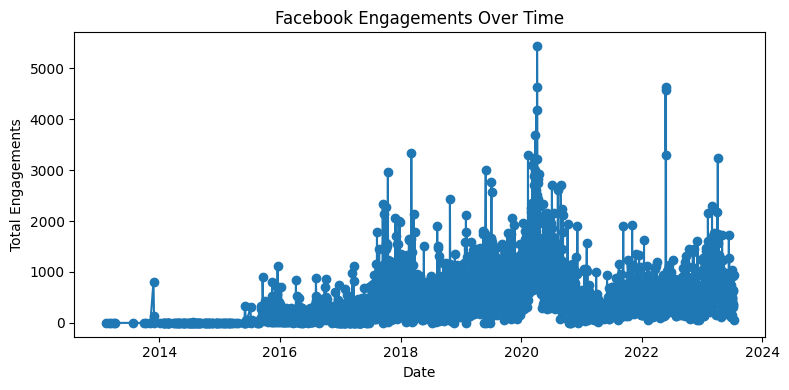

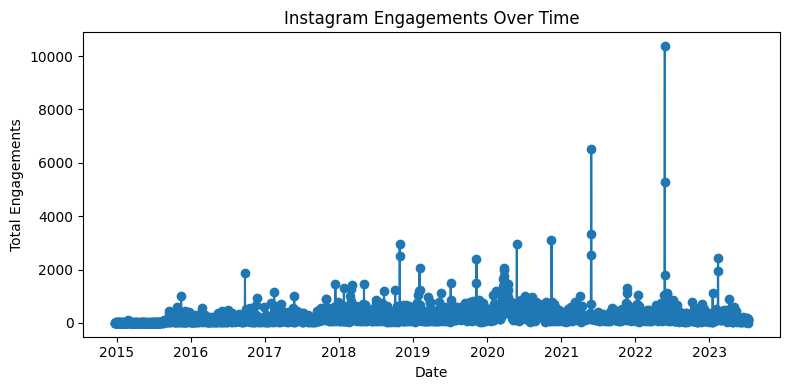

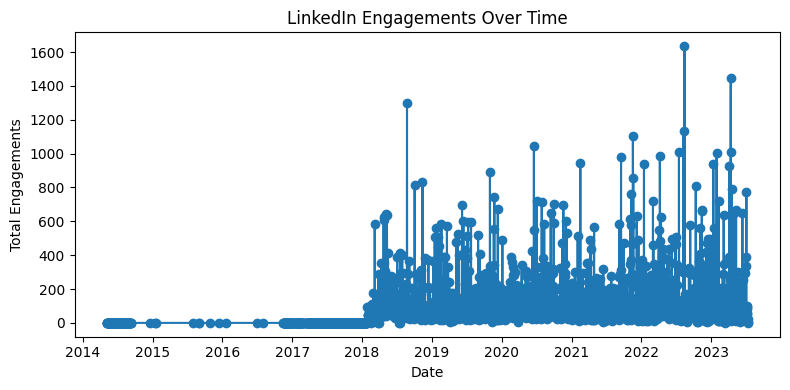

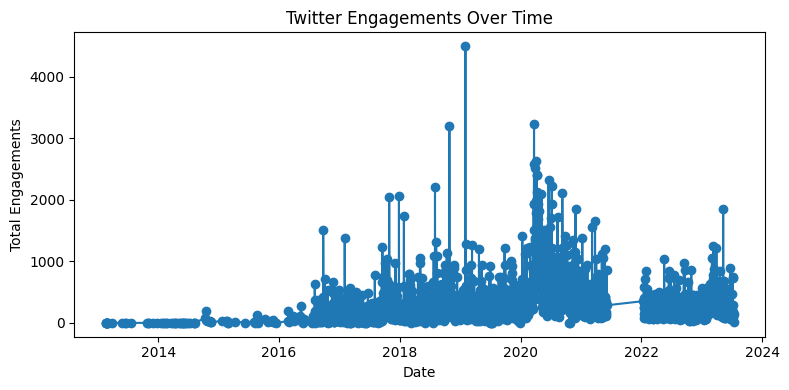

In [20]:
for platform, platform_data in data.items():
    platform_data['date'] = pd.to_datetime(platform_data['date'])
    daily_engagements = platform_data.groupby(platform_data['date'].dt.date)['engagements'].sum()

    plt.figure(figsize=(8, 4))
    daily_engagements.plot(kind='line', marker='o', title=f'{platform} Engagements Over Time')
    plt.xlabel('Date')
    plt.ylabel('Total Engagements')
    plt.tight_layout()
    plt.savefig(f'{platform}_engagements_over_time.png')
    plt.show()

## Output the platform with the highest engagement

Platform with highest engagement
Facebook


Total Engagements
{'Facebook': 1394304.0, 'Instagram': 725162.0, 'LinkedIn': 242264.0, 'Twitter': 709888.0}


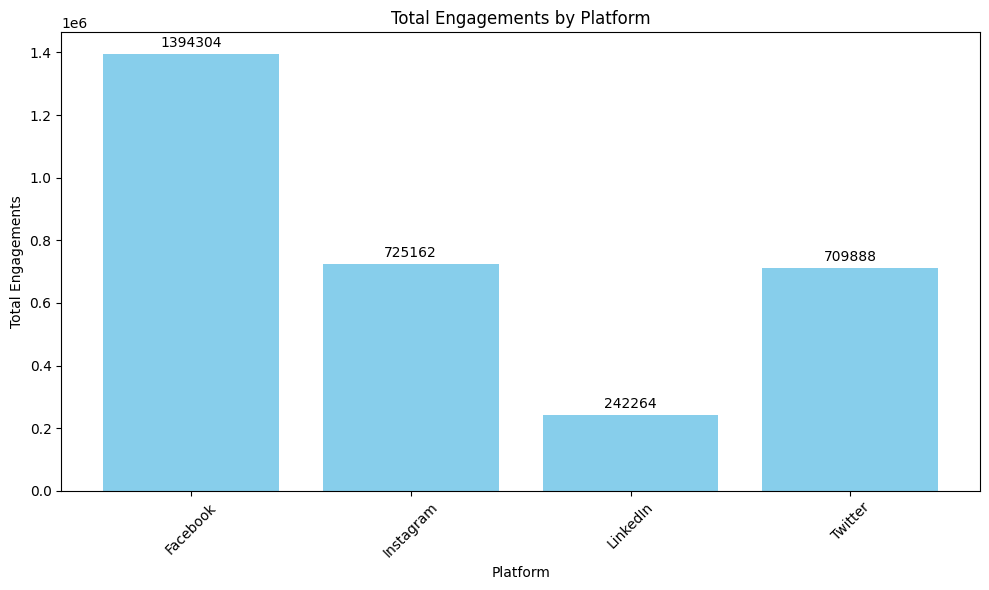

In [12]:

print("Platform with highest engagement")
print(platform_with_highest_engagement)
print("\n\nTotal Engagements")
print(total_engagements)
# Create a bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(total_engagements.keys(), total_engagements.values(), color='skyblue')

# Add text labels for each bar
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.0f}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
                 textcoords='offset points', ha='center', va='bottom')

plt.xlabel('Platform')
plt.ylabel('Total Engagements')
plt.title('Total Engagements by Platform')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()

## Calculate the average engagement rate per impression for each platform

In [24]:
average_engagement_rate = {}
for platform, platform_data in data.items():
    average_engagement_rate[platform] = platform_data["engagement_rate_per_impression"].mean()

# Calculate the most engaging content types on each platform
most_engaging_content = {}
for platform, platform_data in data.items():
    most_engaging_content[platform] = platform_data.groupby("content_type")["engagements"].mean().idxmax()

# Calculate the most impressive content types on each platform
most_impressive_content = {}
for platform, platform_data in data.items():
    most_impressive_content[platform] = platform_data.groupby("content_type")["impressions"].mean().idxmax()

# Convert the 'date' column to a datetime object
for platform, platform_data in data.items():
    platform_data['date'] = pd.to_datetime(platform_data['date'])

# Extract the day of the week and hour of the day
for platform, platform_data in data.items():
    platform_data['day_of_week'] = platform_data['date'].dt.day_name()
    platform_data['hour_of_day'] = platform_data['date'].dt.hour

# Calculate the average engagements for each day of the week and hour of the day
avg_engagements_by_day = {}
avg_engagements_by_hour = {}
for platform, platform_data in data.items():
    avg_engagements_by_day[platform] = platform_data.groupby("day_of_week")["engagements"].mean()
    avg_engagements_by_hour[platform] = platform_data.groupby("hour_of_day")["engagements"].mean()

## Average Engagement Rate per Impression for Each Platform?

Average Engagement Rate per Impression for Each Platform:
{'Facebook': 0.0, 'Instagram': 0.0, 'LinkedIn': 0.0, 'Twitter': 0.0}

Most Engaging Content Types on Each Platform:
{'Facebook': 'Text', 'Instagram': 'Carousel', 'LinkedIn': 'Document', 'Twitter': 'Video'}


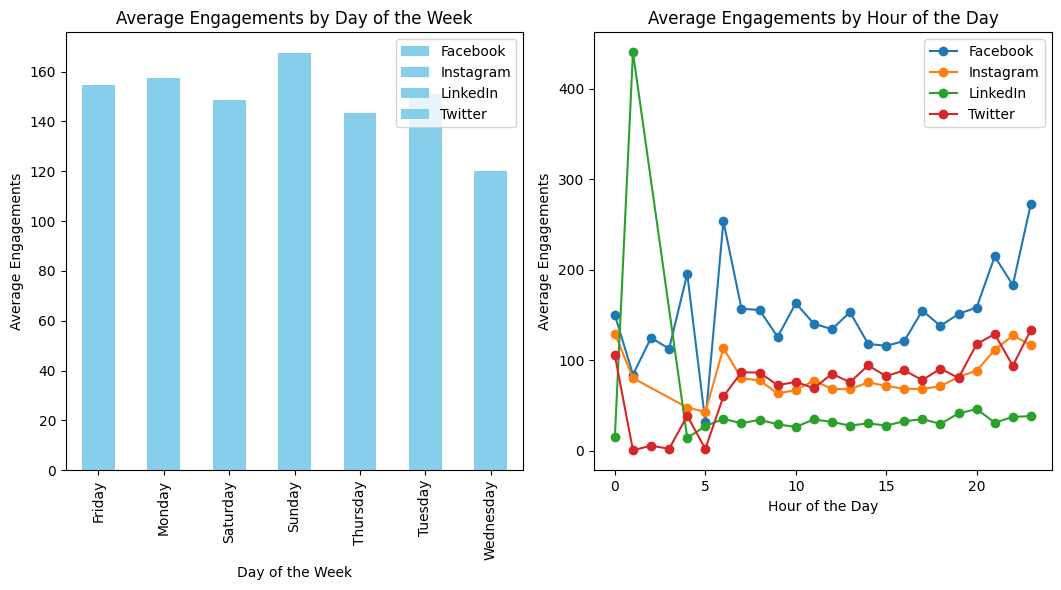

In [22]:

# Print the results
print("Average Engagement Rate per Impression for Each Platform:")
print(average_engagement_rate)

print("\nMost Engaging Content Types on Each Platform:")
print(most_engaging_content)

# Plot average engagements by day of the week and hour of the day for each platform
plt.figure(figsize=(16, 6))
plt.subplot(1, 3, 1)
for platform, avg_engagements in avg_engagements_by_day.items():
    avg_engagements.plot(kind='bar', color='skyblue', label=platform)
plt.title('Average Engagements by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Engagements')
plt.legend()
plt.subplot(1, 3, 2)
for platform, avg_engagements in avg_engagements_by_hour.items():
    avg_engagements.plot(kind='line', marker='o', label=platform)
plt.title('Average Engagements by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Engagements')
plt.legend()
plt.tight_layout()
plt.show()

## Most engaging content

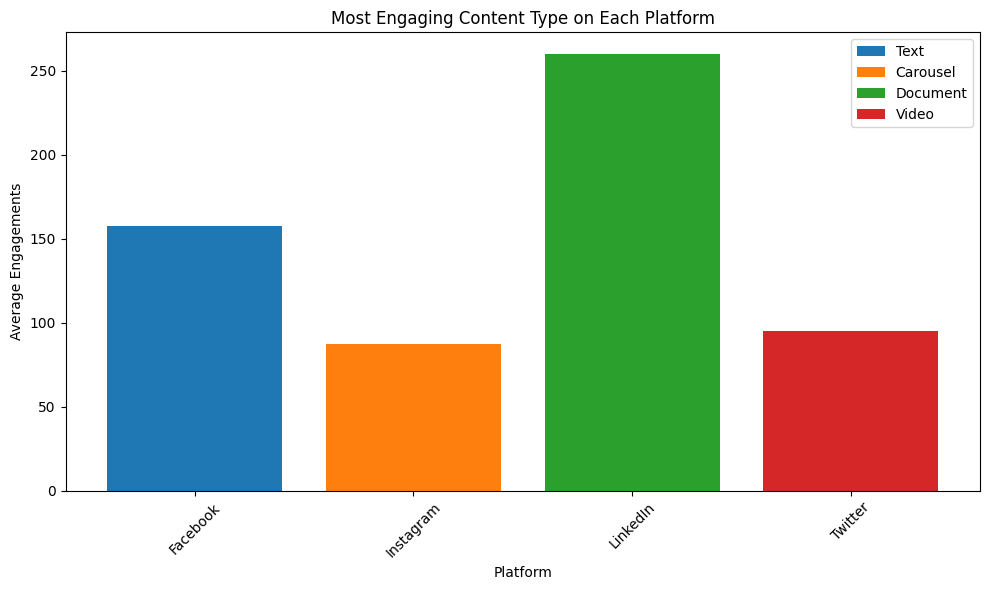

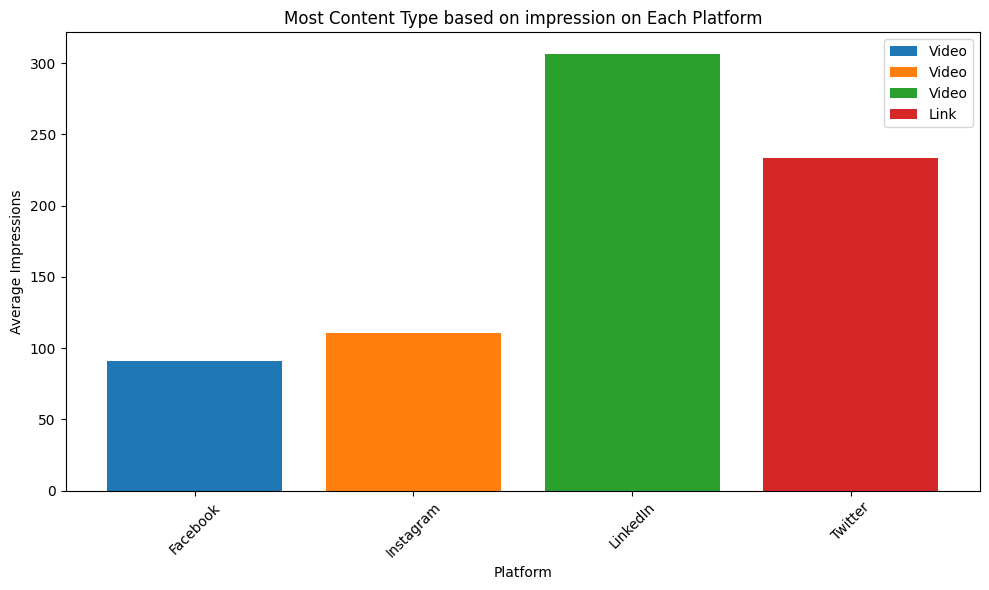

In [25]:
# Create a bar chart for most engaging content
plt.figure(figsize=(10, 6))
for platform, content_type in most_engaging_content.items():
    plt.bar(platform, data[platform].groupby("content_type")["engagements"].mean()[content_type], label=content_type)
plt.xlabel('Platform')
plt.ylabel('Average Engagements')
plt.title('Most Engaging Content Type on Each Platform')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

# Show the bar chart for most engaging content
plt.show()
# Create a bar chart for most impressive content
plt.figure(figsize=(10, 6))
for platform, content_type in most_impressive_content.items():
    plt.bar(platform, data[platform].groupby("content_type")["impressions"].mean()[content_type], label=content_type)
plt.xlabel('Platform')
plt.ylabel('Average Impressions')
plt.title('Most Content Type based on impression on Each Platform')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

# Show the bar chart for most impressive content
plt.show()